<a href="https://colab.research.google.com/github/pratikabhang/AI-DRIVEN-CYBERSECURITY-THREAT-PREDICTION-PLATFORM/blob/main/sql_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# =========================================================
# TASK 1: Install and Initialize PySpark Environment
# =========================================================

!pip install findspark

import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Pratik_PySpark_Tasks").getOrCreate()

print("Spark Session Initialized Successfully")


Spark Session Initialized Successfully


In [19]:
# =========================================================
# TASK 2: Create PySpark DataFrame
# =========================================================

data = [
    ("Alice", 1, "New York"),
    ("Bob", 2, "Los Angeles"),
    ("Charlie", 1, "New York"),
    ("David", 3, "Chicago"),
    ("Eve", 2, "Los Angeles"),
    ("Pratik", 222, "Pune")
]

columns = ["name", "id", "city"]

df = spark.createDataFrame(data, columns)

print("DataFrame Schema:")
df.printSchema()

print("DataFrame Data:")
df.show()


DataFrame Schema:
root
 |-- name: string (nullable = true)
 |-- id: long (nullable = true)
 |-- city: string (nullable = true)

DataFrame Data:
+-------+---+-----------+
|   name| id|       city|
+-------+---+-----------+
|  Alice|  1|   New York|
|    Bob|  2|Los Angeles|
|Charlie|  1|   New York|
|  David|  3|    Chicago|
|    Eve|  2|Los Angeles|
| Pratik|222|       Pune|
+-------+---+-----------+



In [20]:
# =========================================================
# TASK 3: DataFrame API - Select and Filter
# =========================================================

from pyspark.sql.functions import col

df.select("name", "city").filter(col("id") == 1).show()


+-------+--------+
|   name|    city|
+-------+--------+
|  Alice|New York|
|Charlie|New York|
+-------+--------+



In [21]:
# =========================================================
# TASK 4: Register DataFrame as Temporary SQL View
# =========================================================

df.createOrReplaceTempView("people")

print("Temporary SQL View 'people' created successfully")


Temporary SQL View 'people' created successfully


In [22]:
# =========================================================
# TASK 5: Spark SQL - Select All Records
# =========================================================

spark.sql("SELECT * FROM people").show()


+-------+---+-----------+
|   name| id|       city|
+-------+---+-----------+
|  Alice|  1|   New York|
|    Bob|  2|Los Angeles|
|Charlie|  1|   New York|
|  David|  3|    Chicago|
|    Eve|  2|Los Angeles|
| Pratik|222|       Pune|
+-------+---+-----------+



In [23]:
# =========================================================
# TASK 6: Spark SQL - Filter Using WHERE
# =========================================================

spark.sql("""
SELECT name, city
FROM people
WHERE id = 1
""").show()


+-------+--------+
|   name|    city|
+-------+--------+
|  Alice|New York|
|Charlie|New York|
+-------+--------+



In [24]:
# =========================================================
# TASK 7: Spark SQL - Group By City
# =========================================================

spark.sql("""
SELECT city, COUNT(*) AS total_people
FROM people
GROUP BY city
""").show()


+-----------+------------+
|       city|total_people|
+-----------+------------+
|Los Angeles|           2|
|   New York|           2|
|    Chicago|           1|
|       Pune|           1|
+-----------+------------+



In [25]:
# =========================================================
# TASK 8: Create Sales Data CSV File
# =========================================================

import pandas as pd

sales_data = {
    "Product": ["Laptop", "Mouse", "Keyboard", "Monitor", "Webcam"],
    "Region": ["East", "West", "North", "South", "East"],
    "SalesAmount": [1200, 25, 75, 300, 50]
}

sales_df = pd.DataFrame(sales_data)
sales_df.to_csv("sales_data.csv", index=False)

print("sales_data.csv created successfully")
sales_df


sales_data.csv created successfully


,Product,Region,SalesAmount
0,Laptop,East,1200
1,Mouse,West,25
2,Keyboard,North,75
3,Monitor,South,300
4,Webcam,East,50


In [26]:
# =========================================================
# TASK 9: Load Sales CSV into PySpark DataFrame
# =========================================================

sales_pyspark_df = spark.read.csv("sales_data.csv", header=True, inferSchema=True)

sales_pyspark_df.printSchema()
sales_pyspark_df.show()


root
 |-- Product: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- SalesAmount: integer (nullable = true)

+--------+------+-----------+
| Product|Region|SalesAmount|
+--------+------+-----------+
|  Laptop|  East|       1200|
|   Mouse|  West|         25|
|Keyboard| North|         75|
| Monitor| South|        300|
|  Webcam|  East|         50|
+--------+------+-----------+



In [27]:
# =========================================================
# TASK 10: Analyze Sales by Product and Region
# =========================================================

from pyspark.sql.functions import sum

sales_summary_df = sales_pyspark_df.groupBy("Product", "Region") \
    .agg(sum("SalesAmount").alias("TotalSales"))

sales_summary_df.show()


+--------+------+----------+
| Product|Region|TotalSales|
+--------+------+----------+
|  Laptop|  East|      1200|
|  Webcam|  East|        50|
|Keyboard| North|        75|
|   Mouse|  West|        25|
| Monitor| South|       300|
+--------+------+----------+



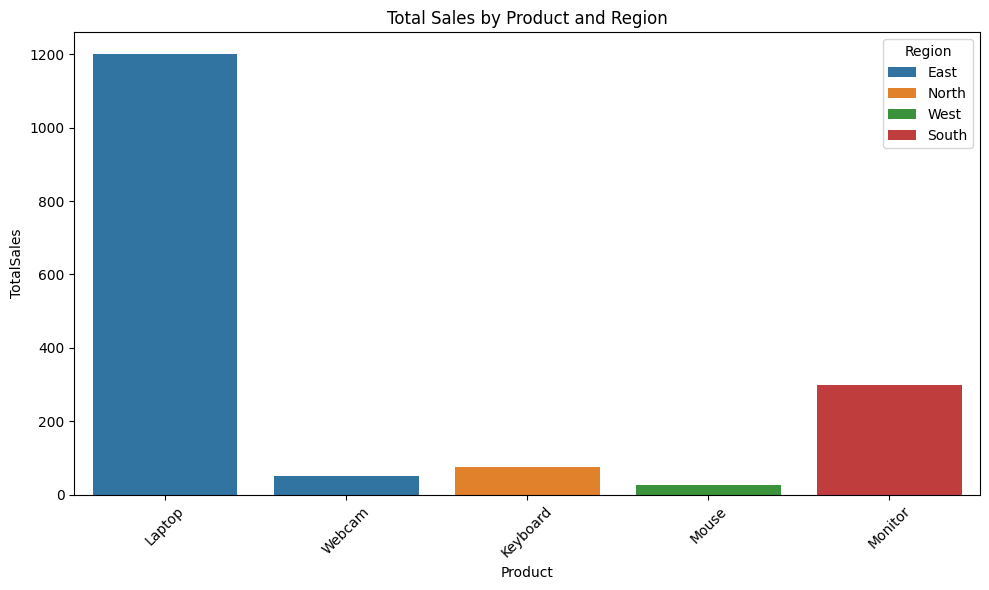

In [28]:
# =========================================================
# TASK 11: Visualize Sales Data
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

sales_pd = sales_summary_df.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="Product", y="TotalSales", hue="Region", data=sales_pd)
plt.title("Total Sales by Product and Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
# =========================================================
# TASK 12: Create JSON File with Missing Values
# =========================================================

import json

people_data = [
    {"name": "Alice", "age": 30, "occupation": "Engineer"},
    {"name": "Bob", "age": None, "occupation": "Doctor"},
    {"name": "Charlie", "age": 35, "occupation": None},
    {"name": "Pratik", "age": 22, "occupation": "Engineer"}
]

with open("people.json", "w") as f:
    json.dump(people_data, f, indent=4)

print("people.json created successfully")


people.json created successfully


In [30]:
# =========================================================
# TASK 13: Load JSON into PySpark DataFrame
# =========================================================

from pyspark.sql.types import StructType, StructField, StringType, IntegerType

schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("occupation", StringType(), True)
])

with open("people.json") as f:
    people_list = json.load(f)

people_df = spark.createDataFrame(people_list, schema)
people_df.show()


+-------+----+----------+
|   name| age|occupation|
+-------+----+----------+
|  Alice|  30|  Engineer|
|    Bob|NULL|    Doctor|
|Charlie|  35|      NULL|
| Pratik|  22|  Engineer|
+-------+----+----------+



In [31]:
# =========================================================
# TASK 14: Add is_adult Column
# =========================================================

from pyspark.sql.functions import when

people_df = people_df.withColumn(
    "is_adult",
    when(col("age") >= 18, True).otherwise(False)
)

people_df.show()


+-------+----+----------+--------+
|   name| age|occupation|is_adult|
+-------+----+----------+--------+
|  Alice|  30|  Engineer|    true|
|    Bob|NULL|    Doctor|   false|
|Charlie|  35|      NULL|    true|
| Pratik|  22|  Engineer|    true|
+-------+----+----------+--------+



In [32]:
# =========================================================
# TASK 15: Handle Missing Values
# =========================================================

print("After Dropping NULL Rows:")
people_df.dropna().show()

print("After Filling NULL Values:")
people_df.fillna({"age": 0, "occupation": "Unknown"}).show()


After Dropping NULL Rows:
+------+---+----------+--------+
|  name|age|occupation|is_adult|
+------+---+----------+--------+
| Alice| 30|  Engineer|    true|
|Pratik| 22|  Engineer|    true|
+------+---+----------+--------+

After Filling NULL Values:
+-------+---+----------+--------+
|   name|age|occupation|is_adult|
+-------+---+----------+--------+
|  Alice| 30|  Engineer|    true|
|    Bob|  0|    Doctor|   false|
|Charlie| 35|   Unknown|    true|
| Pratik| 22|  Engineer|    true|
+-------+---+----------+--------+

